In [11]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
%matplotlib inline

#"""
# The original path of h5 file
train_dataset = h5py.File('/content/drive/MyDrive/ams_595_python_teaching/dataset/train_catvnoncat.h5', "r")
test_dataset = h5py.File('/content/drive/MyDrive/ams_595_python_teaching/dataset/test_catvnoncat.h5', "r")

"""
# The path of h5 file from my laptop
train_dataset = h5py.File('C:/Users/Xiaoyong/Desktop/train_catvnoncat.h5', "r")         # change the path
test_dataset = h5py.File('C:/Users/Xiaoyong/Desktop/test_catvnoncat.h5', "r")           # change the path
#"""

print(train_dataset.keys())
print(train_dataset['train_set_x'])             # x: images of shape (64,64, 3), X contains 209 images (features)
print(train_dataset['train_set_y'])             # y: corresponding boolean values (labels)
print(train_dataset['list_classes'])            # we have two classes


<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>
<HDF5 dataset "train_set_x": shape (209, 64, 64, 3), type "|u1">
<HDF5 dataset "train_set_y": shape (209,), type "<i8">
<HDF5 dataset "list_classes": shape (2,), type "|S7">


In [12]:
# My SBU ID:112496580 end with 0:   160+0
train_X = np.array(train_dataset["train_set_x"][:160])          # Train data choose the first 160
train_Y = np.array(train_dataset["train_set_y"][:160])
test_X = np.array(train_dataset["train_set_x"][160:])           # Test data choose the remianing 49 (160 - 209)
test_Y = np.array(train_dataset["train_set_y"][160:])
classes = np.array(test_dataset["list_classes"][:])
print(train_X.shape)
print(train_Y.shape)
print(classes.shape)
print(classes) # numpy.bytes_
train_Y = train_Y.reshape((1, train_Y.shape[0]))
test_Y  = test_Y.reshape((1, test_Y.shape[0]))
print(test_X.shape)
print(test_Y.shape)


(160, 64, 64, 3)
(160,)
(2,)
[b'non-cat' b'cat']
(49, 64, 64, 3)
(1, 49)


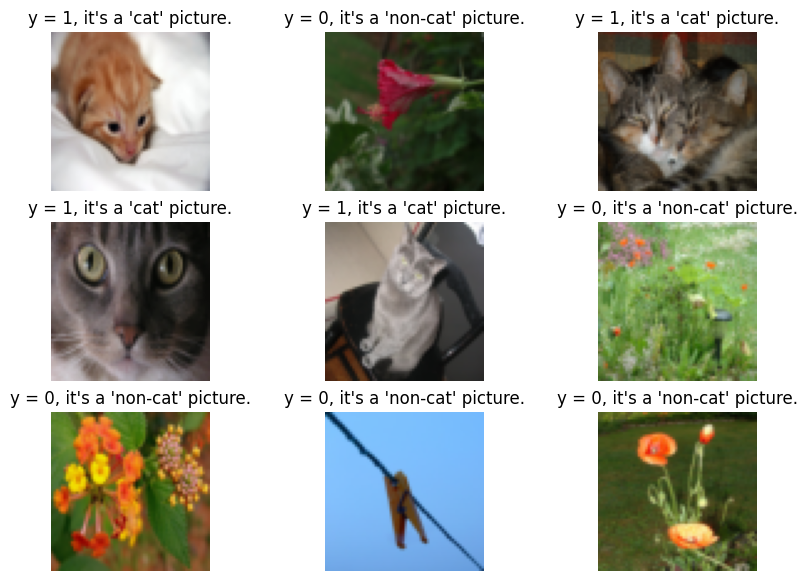

In [13]:
# the indices of images that we want to look at
indices = [57, 58, 59, 60, 61, 62, 63, 64, 65]          # I expand the indeices to 9 elements

# create figure
fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 3                                                # Set with 3 rows and 3 columns
columns = 3

for i in indices:                                       # loop through to plot each figure
  fig.add_subplot(rows, columns, i - 56)                # i - 56 is the subplot indices, 1,2,3,4
  plt.imshow(train_X[i])
  plt.axis('off')
  plt.title("y = " + str(train_Y[0, i]) + ", it's a '" + classes[np.squeeze(train_Y[:, i])].decode("utf-8") +  "' picture.")

The indeics for incorrect predictions are: [0, 1, 3, 5, 7, 8, 12, 13, 16, 18, 20, 21, 22, 23, 24, 26, 27, 29, 30, 31, 33, 34, 35, 36, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48]


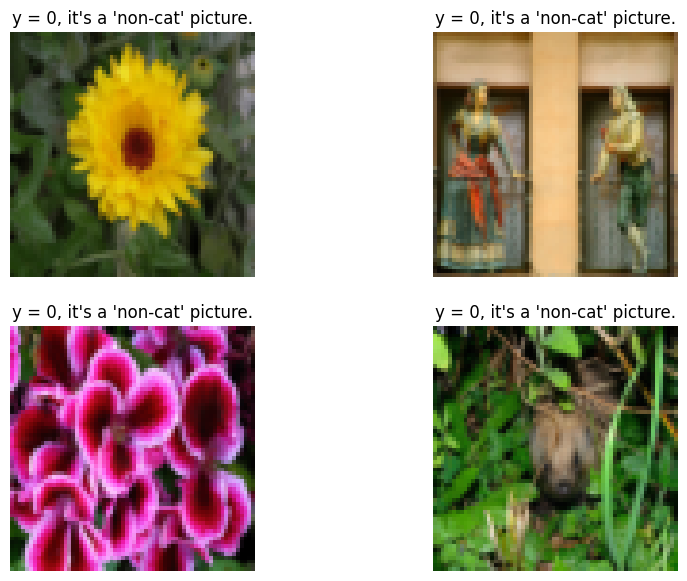

In [14]:
# the indices of images that we want to look at
indices = [15, 16, 17, 18, 19, 20, 21, 22, 23]          # I expand the indeices to 9 elements

# create figure
fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 2                                                # Set with 3 rows and 3 columns
columns = 2

# Find out the indeices for incorrect predictions (non-cat cases)
non_cat_indeices = []
for i in range(0, test_Y.shape[1]) :                    # Loop though indexing 0 to 50.       test_Y.shape: (1,50)
  if np.squeeze(test_Y[:, i]) == 0:                     # 0 denotes'non-cat' and 1 denotes 'cat'
    non_cat_indeices.append(i)                          # Collect the indeices for incorrect predictions (non-cat pictures)
print('The indeics for incorrect predictions are:', non_cat_indeices)


# Only display the images of the first 9 failed-case 
for i in range(0, 4):                                   # loop through the first 4 pictures of non_cat_indeices
  a = non_cat_indeices[i]
  fig.add_subplot(rows, columns, i+1)                   # i + 1 is the subplot indices, 1,2,...,9
  plt.imshow(test_X[a])                                 # show the image
  plt.axis('off')
  plt.title("y = " + str(test_Y[0, a]) + ", it's a '" + classes[np.squeeze(test_Y[:, a])].decode("utf-8") +  "' picture.")


In [15]:
train_X_flat = (train_X.reshape(train_X.shape[0], -1)/255).T  # flatten the image to have a vector, normalize to prevent the calculations from exploding
print(train_X_flat.shape)
test_X_flat = (test_X.reshape(test_X.shape[0], -1)/255).T

(12288, 160)


In [16]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def propagate(w, b, X, Y):

    m = X.shape[1]

    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X) + b)
    cost = np.sum(((- np.log(A))*Y + (-np.log(1-A))*(1-Y)))/m  # compute cost

    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (np.dot(X,(A-Y).T))/m
    db = (np.sum(A-Y))/m

    cost = np.squeeze(cost)

    return dw, db, cost

In [17]:
X = train_X_flat
Y = train_Y
dim = train_X_flat.shape[0]
w = np.zeros((dim,1))                       # initialize w, shape (dim, 1)
b = 0                                       # initialize b, scalar
num_iterations = 10000
learning_rate = 0.001                       # Set learning rate as 0.001  (train accuracy: 90.75 ,test accuracy: 57.14, otherwise test accuracy decrase)
record_cost = 50                            # print out the cost every 50 iterations
costs = []

for i in range(num_iterations):
    dw, db, cost = propagate(w, b, X, Y)


    # gradient descent
    w = w - (learning_rate*dw)
    b = b - (learning_rate*db)

    # Record the costs
    if i % record_cost == 0:
        costs.append(cost)
        print (f"Cost after iteration {i} is: {cost}")

scipy.io.savemat("weights.mat", {"weights":w})
scipy.io.savemat("biases.mat", {"biases":b})


Cost after iteration 0 is: 0.6931471805599453
Cost after iteration 50 is: 0.6122017463205047


Cost after iteration 100 is: 0.5825162826071674
Cost after iteration 150 is: 0.5592278380015869
Cost after iteration 200 is: 0.5396753947011662
Cost after iteration 250 is: 0.5226492561947935
Cost after iteration 300 is: 0.5074875290636794
Cost after iteration 350 is: 0.4937785746894006
Cost after iteration 400 is: 0.4812437897767916
Cost after iteration 450 is: 0.4696833753215778
Cost after iteration 500 is: 0.4589479031368473
Cost after iteration 550 is: 0.44892198317480714
Cost after iteration 600 is: 0.43951423170763404
Cost after iteration 650 is: 0.43065078464658624
Cost after iteration 700 is: 0.42227092613190254
Cost after iteration 750 is: 0.41432403961112235
Cost after iteration 800 is: 0.4067674185875937
Cost after iteration 850 is: 0.39956465518989015
Cost after iteration 900 is: 0.3926844285894136
Cost after iteration 950 is: 0.3860995772408299
Cost after iteration 1000 is: 0.37978637712118013
Cost after iteration 1050 is: 0.3737239724223785
Cost after iteration 1100 is: 0

In [18]:
print(test_X_flat.shape)
w = scipy.io.loadmat('weights.mat')["weights"]
b = scipy.io.loadmat('biases.mat')["biases"]
print(w.shape)
print(b.shape)
A = sigmoid(np.dot(w.T,test_X_flat) + b)
Y_predict_test = (A >= 0.5) * 1.0                               # Make predictions on testing data
Y_predict_train = sigmoid(np.dot(w.T,X) + b)                    # Make predictions on training data

print(f"train accuracy: {(100 - np.mean(np.abs(Y_predict_train - train_Y)) * 100):2f}")
print(f"test accuracy: {(100 - np.mean(np.abs(Y_predict_test - test_Y)) * 100):2f}")

(12288, 49)
(12288, 1)
(1, 1)
train accuracy: 90.755624
test accuracy: 57.142857
